<a href="https://colab.research.google.com/github/srirs/Chat-bot-beginner/blob/main/football%20match%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Drive Access Cell

# mounting google Drive to access the data files
# when asked please give access to the Drive this colab account is connected to

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# LIBRARY IMPORT CELL
#importing libraries
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from itertools import cycle




In [ ]:
# DATADIR CELL
# data file paths

'''
  if opening on local machine please uncomment this and comment the data file paths
  used for colab
'''
# EPLfixure_path = 'data/EPLfixture.csv' # for local machine
# soccer_sqlite_path = 'data/soccer.sqlite' #for local machine
'''
  if opening on local machine please uncomment this and comment the data file paths
  used for local machine
'''
EPLfixure_path = '/content/drive/MyDrive/Code/data/EPLfixture.csv' # for colab
soccer_sqlite_path = '/content/drive/MyDrive/Code/data/soccer.sqlite' #for colab

In [ ]:
#making a connection to the SQL server by using the cursor() method of MYSQL
Myd= sqlite3.connect(soccer_sqlite_path)
cursor = Myd.cursor()

In [ ]:
#reading the data using pandas SQL functions to find the tables in the database
european_soccer_tables = pd.read_sql('select * from sqlite_master where type="table";',Myd)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
european_soccer_tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [ ]:
#reading all the tables with pandas and SQL queries for exploratory data analysis
player_attribute= pd.read_sql_query("SELECT * FROM Player_Attributes", Myd)
player = pd.read_sql_query("SELECT * FROM Player", Myd)
match = pd.read_sql_query("SELECT * FROM Match", Myd)
country= pd.read_sql_query("SELECT * FROM Country", Myd)
league = pd.read_sql_query("SELECT * FROM League", Myd)
team = pd.read_sql_query("SELECT * FROM Team", Myd)
team_attribute= pd.read_sql_query("SELECT * FROM Team_Attributes", Myd)

Exploratory Data Analysis

In [ ]:
#printing the information about player attribute table
print("Dimension_player_attribute{}".format(player_attribute.shape))
print(50*" ")
print(player_attribute.info())
print(50*" ")
print(player_attribute.select_dtypes(exclude=['float64','int64']).describe())
print(50*" ")
print(player_attribute.describe())
print(50*" ")
print(player_attribute.isnull().sum(axis=0))

Dimension_player_attribute(183978, 42)
                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 n

In [ ]:
#computing the null values using fill na method with the mean values
player_attribute['overall_rating'].fillna(player_attribute['overall_rating'].mean(),inplace=True)
player_attribute['potential'].fillna(player_attribute['potential'].mean(),inplace=True)
player_attribute['crossing'].fillna(player_attribute['crossing'].mean(),inplace=True)
player_attribute['finishing'].fillna(player_attribute['finishing'].mean(),inplace=True)
player_attribute['heading_accuracy'].fillna(player_attribute['heading_accuracy'].mean(),inplace=True)
player_attribute['short_passing'].fillna(player_attribute['short_passing'].mean(),inplace=True)
player_attribute['volleys'].fillna(player_attribute['volleys'].mean(),inplace=True)
player_attribute['dribbling'].fillna(player_attribute['dribbling'].mean(),inplace=True)
player_attribute['curve'].fillna(player_attribute['curve'].mean(),inplace=True)
player_attribute['free_kick_accuracy'].fillna(player_attribute['free_kick_accuracy'].mean(),inplace=True)
player_attribute['long_passing'].fillna(player_attribute['long_passing'].mean(),inplace=True)
player_attribute['ball_control'].fillna(player_attribute['ball_control'].mean(),inplace=True)
player_attribute['acceleration'].fillna(player_attribute['acceleration'].mean(),inplace=True)
player_attribute['sprint_speed'].fillna(player_attribute['sprint_speed'].mean(),inplace=True)
player_attribute['agility'].fillna(player_attribute['agility'].mean(),inplace=True)
player_attribute['reactions'].fillna(player_attribute['reactions'].mean(),inplace=True)
player_attribute['balance'].fillna(player_attribute['balance'].mean(),inplace=True)
player_attribute['shot_power'].fillna(player_attribute['shot_power'].mean(),inplace=True)
player_attribute['jumping'].fillna(player_attribute['jumping'].mean(),inplace=True)
player_attribute['stamina'].fillna(player_attribute['stamina'].mean(),inplace=True)
player_attribute['strength'].fillna(player_attribute['strength'].mean(),inplace=True)
player_attribute['long_shots'].fillna(player_attribute['long_shots'].mean(),inplace=True)
player_attribute['aggression'].fillna(player_attribute['aggression'].mean(),inplace=True)
player_attribute['interceptions'].fillna(player_attribute['interceptions'].mean(),inplace=True)
player_attribute['positioning'].fillna(player_attribute['positioning'].mean(),inplace=True)
player_attribute['vision'].fillna(player_attribute['vision'].mean(),inplace=True)
player_attribute['penalties'].fillna(player_attribute['penalties'].mean(),inplace=True)
player_attribute['marking'].fillna(player_attribute['marking'].mean(),inplace=True)
player_attribute['standing_tackle'].fillna(player_attribute['standing_tackle'].mean(),inplace=True)
player_attribute['sliding_tackle'].fillna(player_attribute['sliding_tackle'].mean(),inplace=True)
player_attribute['gk_diving'].fillna(player_attribute['gk_diving'].mean(),inplace=True)
player_attribute['gk_handling'].fillna(player_attribute['gk_handling'].mean(),inplace=True)
player_attribute['gk_kicking'].fillna(player_attribute['gk_kicking'].mean(),inplace=True)
player_attribute['gk_positioning'].fillna(player_attribute['gk_positioning'].mean(),inplace=True)
player_attribute['gk_reflexes'].fillna(player_attribute['gk_reflexes'].mean(),inplace=True)

In [ ]:
#checking for the null values after computing
print(player_attribute.isnull().sum(axis=0))


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                    0
penalties                 0
marking                   0
standing_tackle     

In [ ]:
#showing the player attribute table
player_attribute.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


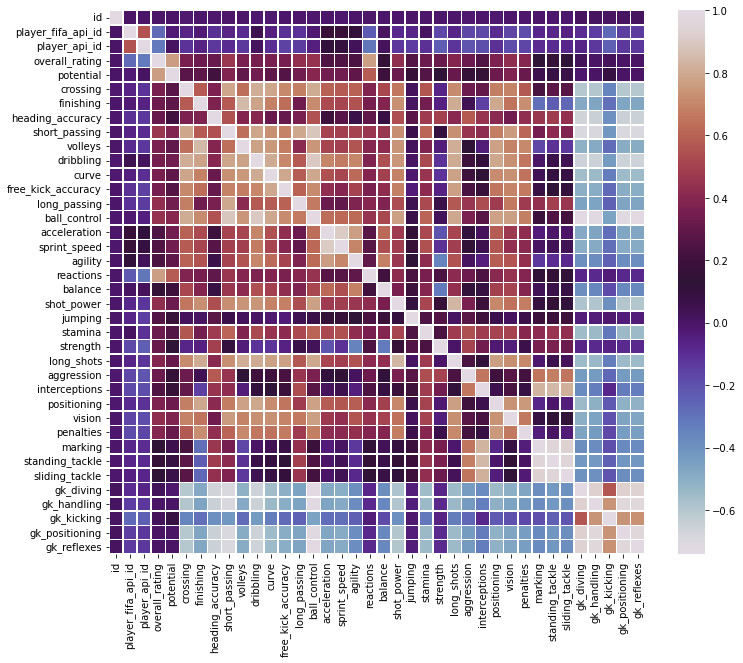

In [ ]:
#picturizing a heatmap of coerelation between the columns of player attribute table after computing
fig,wr = plt.subplots(figsize=(12,10))
sns.heatmap(player_attribute.corr(),
            cmap = "twilight",fmt="d",ax=wr,linewidths=.5)

In [ ]:
#defining the correlation of the main column
player_attribute.corr()['overall_rating']

id                   -0.002869
player_fifa_api_id   -0.273118
player_api_id        -0.322015
overall_rating        1.000000
potential             0.766757
crossing              0.357699
finishing             0.329298
heading_accuracy      0.314099
short_passing         0.458361
volleys               0.359036
dribbling             0.354324
curve                 0.355363
free_kick_accuracy    0.349592
long_passing          0.435018
ball_control          0.444257
acceleration          0.245655
sprint_speed          0.254841
agility               0.238281
reactions             0.769246
balance               0.159284
shot_power            0.427996
jumping               0.257279
stamina               0.327456
strength              0.318661
long_shots            0.392382
aggression            0.323934
interceptions         0.250370
positioning           0.370019
vision                0.428234
penalties             0.393189
marking               0.133377
standing_tackle       0.165349
sliding_

In [ ]:
#exploring player data
print("Dimension_player{}".format(player_attribute.shape))
print(50*" ")
print(player.info())
print(50*" ")
print(player.select_dtypes(exclude=['float64','int64']).describe())
print(50*" ")
print(player.describe())
print(50*" ")
print(player.isnull().sum(axis=0))


Dimension_player(183978, 42)
                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
None
                                                  
       player_name             birthday
count        11060                11060
unique       10848                 5762
top         Danilo  1989-03-02 00:00:00
freq             7                   10
                                                  


In [ ]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [ ]:
#exploring league data
print("Dimension_league{}".format(league.shape))
print(50*" ")
print(league.info())
print(50*" ")
print(league.select_dtypes(exclude=['float64','int64']).describe())
print(50*" ")
print(league.describe())
print(50*" ")
print(league.isnull().sum(axis=0))


Dimension_league(11, 3)
                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes
None
                                                  
                          name
count                       11
unique                      11
top     Belgium Jupiler League
freq                         1
                                                  
                 id    country_id
count     11.000000     11.000000
mean   12452.090909  12452.090909
std     8215.308472   8215.308472
min        1.000000      1.000000
25%     6289.000000   6289.000000
50%    13274.000000  13274.000000
75%    18668.000000  18668.000000
max    24558.000000  24558.000000


In [ ]:
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [ ]:
#exploring the match table
print("Dimension_match{}".format(match.shape))
print(50*" ")
print(match.info())
print(50*" ")
print(match.select_dtypes(exclude=['float64','int64']).describe())
print(50*" ")
print(match.describe())
print(50*" ")
print(match.isnull().sum(axis=0))

Dimension_match(25979, 115)
                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None
                                                  
           season                 date      goal      shoton      shotoff  \
count       25979                25979     14217       14217        14217   
unique          8                 1694     13225        8464         8464   
top     2008/2009  2009-04-11 00:00:00  <goal />  <shoton />  <shotoff />   
freq         3326                   60       993        5754         5754   

            foulcommit      card      cross      corner      possession  
count            14217     14217      14217       14217           14217  
unique            8466     13777       8466        8465            8420  
top     <foulcommit />  <card />  <cross />  <corner />  <possession />  
freq      

In [ ]:
#calling the head rows of the match table
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
#dropping the null value columns as ther are not valuable for now to predict the matches
match.dropna(axis=1,inplace=True)

match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


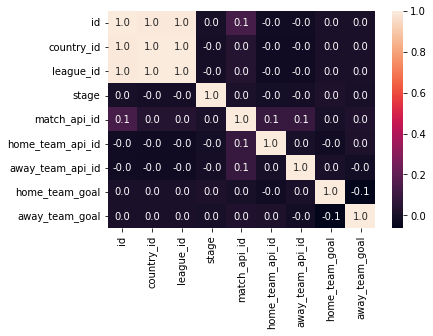

In [ ]:
#correlation of the match table
sns.heatmap(match.corr(),annot=True,fmt=".1f")

In [ ]:
#describing the new match table
print(match.describe())

                 id    country_id     league_id         stage  match_api_id  \
count  25979.000000  25979.000000  25979.000000  25979.000000  2.597900e+04   
mean   12990.000000  11738.630317  11738.630317     18.242773  1.195429e+06   
std     7499.635658   7553.936759   7553.936759     10.407354  4.946279e+05   
min        1.000000      1.000000      1.000000      1.000000  4.831290e+05   
25%     6495.500000   4769.000000   4769.000000      9.000000  7.684365e+05   
50%    12990.000000  10257.000000  10257.000000     18.000000  1.147511e+06   
75%    19484.500000  17642.000000  17642.000000     27.000000  1.709852e+06   
max    25979.000000  24558.000000  24558.000000     38.000000  2.216672e+06   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  
count      25979.000000      25979.000000    25979.000000    25979.000000  
mean        9984.371993       9984.475115        1.544594        1.160938  
std        14087.453758      14087.445135        1.297158   

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

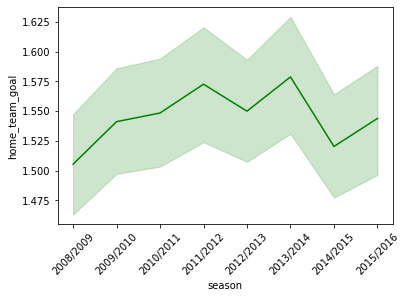

In [ ]:
#line plotting the average  home team goals per season
sns.lineplot(x='season',y ='home_team_goal',data = match,color='green')
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

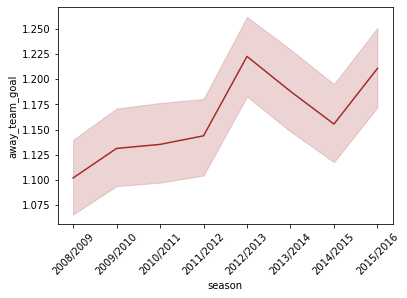

In [ ]:
#lineplotting the average away team goals per season
sns.lineplot(x='season',y ='away_team_goal',data = match,color='brown')
plt.xticks(rotation=45)


In [ ]:
#league matches played in every league in the last season of this data set
match_2016 = match[match['season'] == '2015/2016']
matPlay= match_2016.groupby('league_id')['home_team_api_id'].count().sort_values()
matPlay

league_id
24558    180
19694    228
1        240
15722    240
7809     306
13274    306
17642    306
1729     380
4769     380
10257    380
21518    380
Name: home_team_api_id, dtype: int64

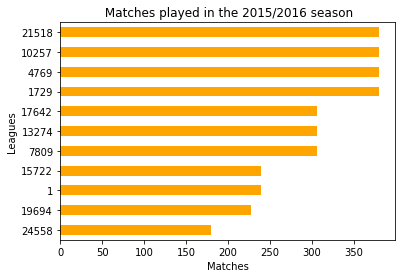

In [ ]:
#plotting the matches played in the 2015/2016
matPlay.plot(kind='barh', title=' Matches played in the 2015/2016 season',color='orange');
plt.xlabel('Matches');
plt.ylabel('Leagues');

In [ ]:

#exploring the country data
print("Dimension_country{}".format(country.shape))
print(50*" ")
print(country.info())
print(50*" ")
print(country.select_dtypes(exclude=['float64','int64']).describe())
print(50*" ")
print(country.describe())
print(50*" ")
print(country.isnull().sum(axis=0))

Dimension_country(11, 2)
                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes
None
                                                  
           name
count        11
unique       11
top     Belgium
freq          1
                                                  
                 id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000
                                                  
id      0
name    0
dtype: int64


In [ ]:
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [ ]:

#exploring the team data
print("Dimension_team{}".format(team.shape))
print(50*" ")
print(team.info())
print(50*" ")
print(team.select_dtypes(exclude=['float64','int64']).describe())
print(50*" ")
print(team.describe())
print(50*" ")
print(team.isnull().sum(axis=0))

Dimension_team(299, 5)
                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None
                                                  
       team_long_name team_short_name
count             299             299
unique            296             259
top       Widzew Łódź             GEN
freq                2               3
                                                  
                 id    team_api_id  team_fifa_api_id
count    299.000000     299.000000        288.000000
mean   23735.301003   12340

In [ ]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [ ]:
#exploring the team_attribute data
print("Dimension_team_attribute{}".format(team_attribute.shape))
print(50*" ")
print(team_attribute.info())
print(50*" ")
print(team_attribute.select_dtypes(exclude=['float64','int64']).describe())
print(50*" ")
print(team_attribute.describe())
print(50*" ")
print(team_attribute.isnull().sum(axis=0))

Dimension_team_attribute(1458, 25)
                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCre

In [ ]:
#computing the null values
team_attribute['buildUpPlayDribbling'].fillna(team_attribute['buildUpPlayDribbling'].mean(),inplace=True)
team_attribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,48.607362,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.000000,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.000000,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,48.607362,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,48.607362,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


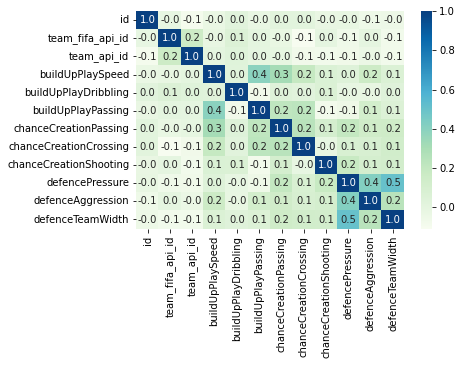

In [ ]:
#correlation of columns in the team attribute
sns.heatmap(team_attribute.corr(),annot=True, fmt = ".1f",cmap='GnBu')

In [ ]:
#exploring the spanish league by SQL queries
LeagueOfSpain = pd.read_sql('''
SELECT home.team_long_name as homeTeam,
       match.home_team_goal,
       (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 3
            WHEN home_team_goal < away_team_goal THEN 0
        END)pointHome,
       away.team_long_name as awayTeam,
       match.away_team_goal,
       (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 0
            WHEN home_team_goal < away_team_goal THEN 3
        END)pointAway
FROM Country
JOIN match on match.country_id = country.id
AND name = "Spain"
AND season = "2015/2016"
LEFT JOIN Team as home on home.team_api_id = match.home_team_api_id
LEFT JOIN Team as away on away.team_api_id = match.away_team_api_id
;''', Myd)
LeagueOfSpain

,homeTeam,home_team_goal,pointHome,awayTeam,away_team_goal,pointAway
0,Levante UD,1,0,RC Celta de Vigo,2,3
1,Atlético Madrid,1,3,UD Las Palmas,0,0
2,Málaga CF,0,1,Sevilla FC,0,1
3,Athletic Club de Bilbao,0,0,FC Barcelona,1,3
4,Granada CF,1,0,SD Eibar,3,3
5,RCD Espanyol,1,3,Getafe CF,0,0
6,Real Betis Balompié,1,1,Villarreal CF,1,1
7,Real Sporting de Gijón,0,1,Real Madrid CF,0,1
8,RC Deportivo de La Coruña,0,1,Real Sociedad,0,1
9,Rayo Vallecano,0,1,Valencia CF,0,1


In [ ]:
#points table for the spanish league
spain1 = LeagueOfSpain[['homeTeam', 'home_team_goal', 'pointHome']]
spain2 = LeagueOfSpain[['awayTeam', 'away_team_goal', 'pointAway']]
t1= pd.DataFrame(np.concatenate((
    spain1.values, spain2.values), axis=0))
t1.columns = ['TeaM', 'GoAlS', 'PoInTs']
Summary_spain = t1.groupby('TeaM')[['GoAlS', 'PoInTs']].sum()
Spain_Liga_BBVA_standings= Summary_spain.sort_values(by='PoInTs', ascending=False)
Spain_Liga_BBVA_standings.head()

,GoAlS,PoInTs
TeaM,,
FC Barcelona,112,91
Real Madrid CF,110,90
Atlético Madrid,63,88
Villarreal CF,44,64
Athletic Club de Bilbao,58,62


In [ ]:
#exploring the germany league
LeagueOfGermany = pd.read_sql('''
SELECT home.team_long_name as homeTeam,
       match.home_team_goal,
       (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 3
            WHEN home_team_goal < away_team_goal THEN 0
        END)pointHome,
       away.team_long_name as awayTeam,
       match.away_team_goal,
       (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 0
            WHEN home_team_goal < away_team_goal THEN 3
        END)pointAway
FROM Country
JOIN match on match.country_id = country.id
AND name = "Germany"
AND season = "2015/2016"
LEFT JOIN Team as home on home.team_api_id = match.home_team_api_id
LEFT JOIN Team as away on away.team_api_id = match.away_team_api_id
;''', Myd)
LeagueOfGermany.tail()

,homeTeam,home_team_goal,pointHome,awayTeam,away_team_goal,pointAway
301,FC Augsburg,0,0,SV Darmstadt 98,2,3
302,SV Werder Bremen,0,0,FC Bayern Munich,1,3
303,Eintracht Frankfurt,1,0,Borussia Mönchengladbach,5,3
304,1. FC Köln,0,0,Hannover 96,1,3
305,1. FSV Mainz 05,0,0,Borussia Dortmund,2,3


In [ ]:
#germany league points table
Germany1 = LeagueOfGermany[['homeTeam', 'home_team_goal', 'pointHome']]
Germany2 = LeagueOfGermany[['awayTeam', 'away_team_goal', 'pointAway']]
t2= pd.DataFrame(np.concatenate((
    Germany1.values, Germany2.values), axis=0))
t2.columns = ['TeaM', 'GoAlS', 'PoInTs']
Summary_germany = t2.groupby('TeaM')[['GoAlS', 'PoInTs']].sum()
BundesLiga_standings= Summary_germany.sort_values(by='PoInTs', ascending=False)
BundesLiga_standings

,GoAlS,PoInTs
TeaM,,
FC Bayern Munich,80,88
Borussia Dortmund,82,78
Bayer 04 Leverkusen,56,60
Borussia Mönchengladbach,67,55
FC Schalke 04,51,52
Hertha BSC Berlin,42,50
1. FSV Mainz 05,46,50
VfL Wolfsburg,47,45
1. FC Köln,38,43


In [ ]:
#exploring the england league
LeagueOfEngland = pd.read_sql('''
SELECT home.team_long_name as homeTeam,
       match.home_team_goal,
       (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 3
            WHEN home_team_goal < away_team_goal THEN 0
        END)pointHome,
        (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 0
            WHEN home_team_goal < away_team_goal THEN 3
        END)pointAway,
       away.team_long_name as awayTeam,
       match.away_team_goal
FROM Country
JOIN match on match.country_id = country.id
AND name = "England"
AND season = "2015/2016"
LEFT JOIN Team as home on home.team_api_id = match.home_team_api_id
LEFT JOIN Team as away on away.team_api_id = match.away_team_api_id
;''', Myd)
LeagueOfEngland.tail()

,homeTeam,home_team_goal,pointHome,pointAway,awayTeam,away_team_goal
375,Southampton,2,1,1,Leicester City,2
376,Swansea City,0,0,3,Stoke City,1
377,Tottenham Hotspur,0,1,1,Liverpool,0
378,Watford,0,0,3,Arsenal,3
379,West Bromwich Albion,1,3,0,Sunderland,0


In [ ]:
#points table of England
England1= LeagueOfEngland[['homeTeam', 'home_team_goal', 'pointHome']]
England2 = LeagueOfEngland[['awayTeam', 'away_team_goal', 'pointAway']]
t3= pd.DataFrame(np.concatenate((
    England1.values, England2.values), axis=0))
t3.columns = ['TeaM', 'GoAlS', 'PoInTs']
Summary_eng = t3.groupby('TeaM')[['GoAlS', 'PoInTs']].sum()
EnglishPremierLeague_Standings= Summary_eng.sort_values(by='PoInTs', ascending=False)
EnglishPremierLeague_Standings


,GoAlS,PoInTs
TeaM,,
Leicester City,68,81
Arsenal,65,71
Tottenham Hotspur,69,70
Manchester United,49,66
Manchester City,71,66
Southampton,59,63
West Ham United,65,62
Liverpool,63,60
Stoke City,41,51


In [ ]:
#exploring whole data of leagues
LeagueOFdata = pd.read_sql('''
SELECT home.team_long_name as homeTeam,
       match.home_team_goal,
       (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 3
            WHEN home_team_goal < away_team_goal THEN 0
        END)pointHome,
       away.team_long_name as awayTeam,
       match.away_team_goal,
       (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 0
            WHEN home_team_goal < away_team_goal THEN 3
        END)pointAway
FROM Country
JOIN match on match.country_id = country.id
LEFT JOIN Team as home on home.team_api_id = match.home_team_api_id
LEFT JOIN Team as away on away.team_api_id = match.away_team_api_id
;''', Myd)
LeagueOFdata.head()

,homeTeam,home_team_goal,pointHome,awayTeam,away_team_goal,pointAway
0,KRC Genk,1,1,Beerschot AC,1,1
1,SV Zulte-Waregem,0,1,Sporting Lokeren,0,1
2,KSV Cercle Brugge,0,0,RSC Anderlecht,3,3
3,KAA Gent,5,3,RAEC Mons,0,0
4,FCV Dender EH,1,0,Standard de Liège,3,3


In [ ]:
#Adding goal difference and establishing who is the winner
winne = []
for i in range (len(LeagueOFdata['homeTeam'])):
    if LeagueOFdata ['home_team_goal'][i] > LeagueOFdata['away_team_goal'][i]:
        winne.append(LeagueOFdata['homeTeam'][i])
    elif LeagueOFdata['home_team_goal'][i] < LeagueOFdata ['away_team_goal'][i]:
        winne.append(LeagueOFdata['awayTeam'][i])
    else:
        winne.append('Draw')
LeagueOFdata['TeamWon'] = winne

#adding goal difference column
LeagueOFdata['goal_difference'] = np.absolute(LeagueOFdata['home_team_goal'] - LeagueOFdata['away_team_goal'])
LeagueOFdata.head()


,homeTeam,home_team_goal,pointHome,awayTeam,away_team_goal,pointAway,TeamWon,goal_difference
0,KRC Genk,1,1,Beerschot AC,1,1,Draw,0
1,SV Zulte-Waregem,0,1,Sporting Lokeren,0,1,Draw,0
2,KSV Cercle Brugge,0,0,RSC Anderlecht,3,3,RSC Anderlecht,3
3,KAA Gent,5,3,RAEC Mons,0,0,KAA Gent,5
4,FCV Dender EH,1,0,Standard de Liège,3,3,Standard de Liège,2


In [ ]:
#narrowing the new season teams with the whole data
NewSeason_teams = ['Leicester City', ' Arsenal', 'Tottenham', 'Manchester United',
            'Manchester City', 'Southampton', 'West Ham United', 'Liverpool',
            'Brighton', 'Chelsea', 'Everton', 'Wolves',
            'Leeds United', 'Nottingham', 'Crystal Palace', 'Bournemouth',
            'Brentford', 'Newcastle United', 'Fulham', 'Aston Villa']
english_home = LeagueOFdata[LeagueOFdata['homeTeam'].isin(NewSeason_teams)]
english_away = LeagueOFdata[LeagueOFdata['awayTeam'].isin(NewSeason_teams)]
england_teams = pd.concat((english_home, english_away))
england_teams.drop_duplicates()
england_teams.count()

homeTeam           2964
home_team_goal     2964
pointHome          2964
awayTeam           2964
away_team_goal     2964
pointAway          2964
TeamWon            2964
goal_difference    2964
dtype: int64

In [ ]:
england_teams.head()

,homeTeam,home_team_goal,pointHome,awayTeam,away_team_goal,pointAway,TeamWon,goal_difference
1728,Manchester United,1,1,Newcastle United,1,1,Draw,0
1731,West Ham United,2,3,Wigan Athletic,1,0,West Ham United,1
1732,Aston Villa,4,3,Manchester City,2,0,Aston Villa,2
1733,Everton,2,0,Blackburn Rovers,3,3,Blackburn Rovers,1
1737,Chelsea,4,3,Portsmouth,0,0,Chelsea,4


In [ ]:
LeagueOfEngland1=england_teams.drop(['home_team_goal','pointHome','pointAway','away_team_goal','goal_difference'],axis=1)
LeagueOfEngland1.tail()

,homeTeam,awayTeam,TeamWon
4759,Crystal Palace,West Ham United,West Ham United
4760,Everton,Manchester United,Manchester United
4761,Manchester City,Bournemouth,Manchester City
4763,Southampton,Leicester City,Draw
4765,Tottenham Hotspur,Liverpool,Draw


In [ ]:

LeagueOfEngland1 = LeagueOfEngland1.reset_index(drop=True)
LeagueOfEngland1.loc[LeagueOfEngland1.TeamWon == LeagueOfEngland1.homeTeam,'TeamWon']=2
LeagueOfEngland1.loc[LeagueOfEngland1.TeamWon == 'Draw', 'TeamWon']=1
LeagueOfEngland1.loc[LeagueOfEngland1.TeamWon == LeagueOfEngland1.awayTeam, 'TeamWon']=0

LeagueOfEngland1.head()

,homeTeam,awayTeam,TeamWon
0,Manchester United,Newcastle United,1
1,West Ham United,Wigan Athletic,2
2,Aston Villa,Manchester City,2
3,Everton,Blackburn Rovers,0
4,Chelsea,Portsmouth,2


Developing prediction models

In [ ]:
#categorical variables are converted in to continous inputs for the teams
#using the pandas getting the dummy variables
final_football_league1= pd.get_dummies(LeagueOfEngland1, prefix=['homeTeam','awayTeam'], columns=['homeTeam', 'awayTeam'])

# seperating the data in to X and Y for the test train split
X = final_football_league1.drop(['TeamWon'], axis=1)
y = final_football_league1["TeamWon"]
y = y.astype('int')
pca = PCA(svd_solver="full")
pca.fit(X)
#standardizing X data using standard scalar
normalized_data = preprocessing.StandardScaler().fit(X,y)

#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)





In [ ]:
final_football_league1.head()

,TeamWon,homeTeam_Arsenal,homeTeam_Aston Villa,homeTeam_Birmingham City,homeTeam_Blackburn Rovers,homeTeam_Blackpool,homeTeam_Bolton Wanderers,homeTeam_Bournemouth,homeTeam_Burnley,homeTeam_Cardiff City,homeTeam_Chelsea,homeTeam_Crystal Palace,homeTeam_Everton,homeTeam_Fulham,homeTeam_Hull City,homeTeam_Leicester City,homeTeam_Liverpool,homeTeam_Manchester City,homeTeam_Manchester United,homeTeam_Middlesbrough,homeTeam_Newcastle United,homeTeam_Norwich City,homeTeam_Portsmouth,homeTeam_Queens Park Rangers,homeTeam_Reading,homeTeam_Southampton,homeTeam_Stoke City,homeTeam_Sunderland,homeTeam_Swansea City,homeTeam_Tottenham Hotspur,homeTeam_Watford,homeTeam_West Bromwich Albion,homeTeam_West Ham United,homeTeam_Wigan Athletic,homeTeam_Wolverhampton Wanderers,awayTeam_Arsenal,awayTeam_Aston Villa,awayTeam_Birmingham City,awayTeam_Blackburn Rovers,awayTeam_Blackpool,awayTeam_Bolton Wanderers,awayTeam_Bournemouth,awayTeam_Burnley,awayTeam_Cardiff City,awayTeam_Chelsea,awayTeam_Crystal Palace,awayTeam_Everton,awayTeam_Fulham,awayTeam_Hull City,awayTeam_Leicester City,awayTeam_Liverpool,awayTeam_Manchester City,awayTeam_Manchester United,awayTeam_Middlesbrough,awayTeam_Newcastle United,awayTeam_Norwich City,awayTeam_Portsmouth,awayTeam_Queens Park Rangers,awayTeam_Reading,awayTeam_Southampton,awayTeam_Stoke City,awayTeam_Sunderland,awayTeam_Swansea City,awayTeam_Tottenham Hotspur,awayTeam_Watford,awayTeam_West Bromwich Albion,awayTeam_West Ham United,awayTeam_Wigan Athletic,awayTeam_Wolverhampton Wanderers
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## **Logistic regression model**

In [ ]:
#developing the logistic regression model
logistic_league = LogisticRegression(C=0.0543, class_weight=None,fit_intercept=True,n_jobs=-1,max_iter=1000,intercept_scaling=0.9,multi_class='ovr',penalty='l2', warm_start=False,random_state=100)
logistic_league.fit(X_train, y_train)
print("Accuracy of Logistic Regression Training set",logistic_league.score(X_train, y_train))
print("Accuracy of Logistic Regression Testing set",logistic_league.score(X_test, y_test))


Accuracy of Logistic Regression Training set 0.5308582449373191
Accuracy of Logistic Regression Testing set 0.5235955056179775


[[112   2 146]
 [ 56   3 157]
 [ 63   0 351]]


Text(33.0, 0.5, 'True label')

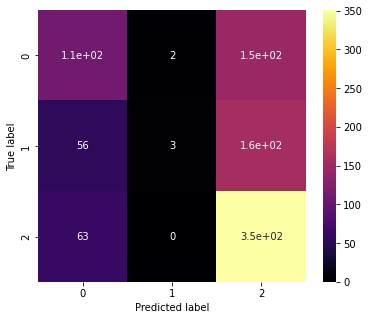

In [ ]:
#plotting the confusion matrix
c=confusion_matrix(y_test, logistic_league.predict(X_test))
print(c)
plt.figure(figsize=(6,5))
sns.heatmap(c,annot=True,cmap='inferno')
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [ ]:
#evaluation metrics for the logistic regression model including k-fold validation
print("Balanced Accuracy of Logistic Regression model :",balanced_accuracy_score(y_test, logistic_league.predict(X_test)))
print(100*" ")
print("F1-score of Logistic Regression model :",f1_score(y_test, logistic_league.predict(X_test), pos_label='positive',average='weighted'))
print(100*" ")
print("Precision Score of Logistic Regression model : ",precision_score(y_test, logistic_league.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("Recall Score of Logistic Regression model : ",recall_score(y_test, logistic_league.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("K-Fold cross validation of Logistic Regression model :",cross_validate(logistic_league, X, y, cv=10))


Balanced Accuracy of Logistic Regression model : 0.4308280688715471
                                                                                                    
F1-score of Logistic Regression model : 0.44562125863188634
                                                                                                    
Precision Score of Logistic Regression model :  0.540515244184969
                                                                                                    
Recall Score of Logistic Regression model :  0.4308280688715471
                                                                                                    


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


K-Fold cross validation of Logistic Regression model : {'fit_time': array([0.61621833, 0.61042213, 0.62037754, 0.56730556, 0.56971264,
       0.57834649, 0.57821274, 0.57274008, 0.56762004, 0.57307863]), 'score_time': array([0.0064435 , 0.00424933, 0.00245881, 0.00266886, 0.00259614,
       0.00243235, 0.00236607, 0.00407028, 0.00238323, 0.00255036]), 'test_score': array([0.53198653, 0.52861953, 0.50841751, 0.52525253, 0.54054054,
       0.53378378, 0.52364865, 0.5       , 0.54054054, 0.46959459])}


## **Support Vector Machine**

In [ ]:
#developing the support vector machine model
svm_league = svm.SVC(C=0.9,kernel='rbf',degree=3, gamma='scale', coef0=0.1, random_state=100,max_iter=1000,probability=True)
svm_league.fit(X_train, y_train)
print("Accuracy of Support Vector Machine Training set",svm_league.score(X_train, y_train))
print("Accuracy of Support Vector Machine Testing set",svm_league.score(X_test, y_test))


Accuracy of Support Vector Machine Training set 0.6311475409836066
Accuracy of Support Vector Machine Testing set 0.5460674157303371


[[129  16 115]
 [ 68  33 115]
 [ 70  20 324]]


Text(33.0, 0.5, 'True label')

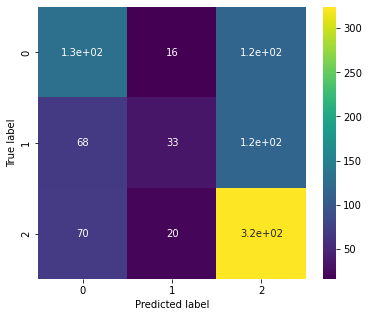

In [ ]:
#plotting the confusion matrix for the support vector machine
d=confusion_matrix(y_test, svm_league.predict(X_test))
print(d)
plt.figure(figsize=(6,5))
sns.heatmap(d,annot=True,cmap='viridis')
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [ ]:
#evaluation metrics for the support vector machine model including the kfold validation
print("Balanced Accuracy of Support Vector Machine :",balanced_accuracy_score(y_test, svm_league.predict(X_test)))
print(100*" ")
print("F1-score of Support Vector Machine :",f1_score(y_test, svm_league.predict(X_test), pos_label='positive',average='weighted'))
print(100*" ")
print("Precision Score of Support Vector Machine : ",precision_score(y_test, svm_league.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("Recall Score of Support Vector Machine : ",recall_score(y_test, svm_league.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("K-Fold cross validation of Support Vector Machine :",cross_validate(svm_league, X, y, cv=10))


Balanced Accuracy of Support Vector Machine : 0.47718010652793263
                                                                                                    
F1-score of Support Vector Machine : 0.5106158157455944
                                                                                                    


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Precision Score of Support Vector Machine :  0.5154148273691005
                                                                                                    
Recall Score of Support Vector Machine :  0.47718010652793263
                                                                                                    


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: Convergen

K-Fold cross validation of Support Vector Machine : {'fit_time': array([3.36420345, 3.17106819, 3.24905396, 3.23725605, 3.27897978,
       4.63686156, 6.14384174, 3.62386894, 3.18367052, 3.11452603]), 'score_time': array([0.07101274, 0.07231021, 0.07249498, 0.07061505, 0.07036042,
       0.11888742, 0.14090705, 0.06910086, 0.07122064, 0.07555079]), 'test_score': array([0.52525253, 0.52861953, 0.54545455, 0.56228956, 0.54054054,
       0.52364865, 0.51013514, 0.48986486, 0.5       , 0.47297297])}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


## **Neural Network Model**

In [ ]:
#developing the neural network model
neural_classifier = MLPClassifier(hidden_layer_sizes=(15,3), random_state=42, max_iter=1000, warm_start=False)
neural_classifier.fit(X_train,y_train)
print("Accuracy of Neural Network Training set",neural_classifier.score(X_train, y_train))
print("Accuracy of Neural Network Testing set",neural_classifier.score(X_test, y_test))


Accuracy of Neural Network Training set 0.6451301832208293
Accuracy of Neural Network Testing set 0.5056179775280899


[[102  56 102]
 [ 54  55 107]
 [ 65  56 293]]


Text(33.0, 0.5, 'True label')

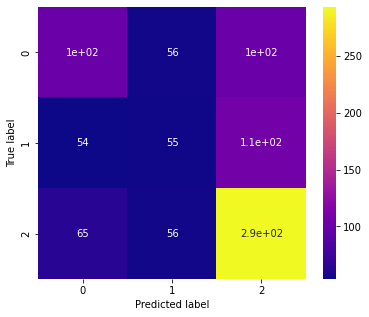

In [ ]:
#plotting the confusion matrix for the neural network model
e=confusion_matrix(y_test, neural_classifier.predict(X_test))
print(e)
plt.figure(figsize=(6,5))
sns.heatmap(e,annot=True,cmap='plasma')
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [ ]:
#evaluation metrics for the neural network model
print("Balanced Accuracy of Neural Network Model :",balanced_accuracy_score(y_test, neural_classifier.predict(X_test)))
print(100*" ")
print("F1-score of Neural Network Model :",f1_score(y_test, neural_classifier.predict(X_test), pos_label='positive',average='weighted'))
print(100*" ")
print("Precision Score of Neural Network Model : ",precision_score(y_test, neural_classifier.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("Recall Score of Neural Network Model : ",recall_score(y_test, neural_classifier.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("K-Fold cross validation of Neural Network Model :",cross_validate(neural_classifier, X, y, cv=10))


Balanced Accuracy of Neural Network Model : 0.45155559684545193
                                                                                                    
F1-score of Neural Network Model : 0.4911891597520831
                                                                                                    
Precision Score of Neural Network Model :  0.45818170584971646
                                                                                                    
Recall Score of Neural Network Model :  0.45155559684545193
                                                                                                    


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


K-Fold cross validation of Neural Network Model : {'fit_time': array([ 6.7951262 , 12.95139742,  6.85282016,  5.8220377 ,  9.13380098,
        9.93328285,  9.27693844,  6.71030569,  6.79390574,  6.1271379 ]), 'score_time': array([0.00288534, 0.00435328, 0.00285053, 0.00811148, 0.00821257,
       0.00817895, 0.00362277, 0.00281763, 0.00313759, 0.0066154 ]), 'test_score': array([0.53535354, 0.51178451, 0.55218855, 0.57239057, 0.55067568,
       0.48310811, 0.48310811, 0.48310811, 0.47297297, 0.45608108])}


Random Forest Classifier

In [ ]:
#developing the random forest classifier model
rfc_classifier= RandomForestClassifier(n_estimators=12,criterion="entropy",max_features=40,n_jobs=1,warm_start=True,max_samples=7,max_depth=100, random_state=100)
rfc_classifier.fit(X_train,y_train)
print("Accuracy of Random Forest Classifier Training set",rfc_classifier.score(X_train, y_train))
print("Accuracy of Random Forest Classifier Testing set",rfc_classifier.score(X_test, y_test))



Accuracy of Random Forest Classifier Training set 0.4411764705882353
Accuracy of Random Forest Classifier Testing set 0.4280898876404494


[[ 84   0 176]
 [ 48   2 166]
 [118   1 295]]


Text(33.0, 0.5, 'True label')

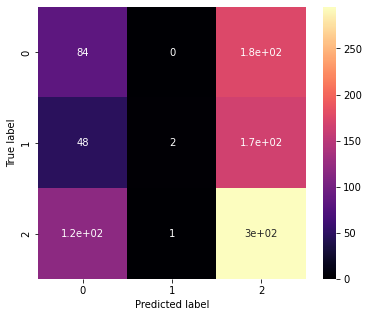

In [ ]:
#plotting the confusion matrix for the random forest
f=confusion_matrix(y_test, rfc_classifier.predict(X_test))
print(f)
plt.figure(figsize=(6,5))
sns.heatmap(f,annot=True,cmap='magma')
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [ ]:
#evaluation metrics for the random forest inclusind k-fold validation
print("Balanced Accuracy of Random Forest Classifier :",balanced_accuracy_score(y_test, rfc_classifier.predict(X_test)))
print(100*" ")
print("F1-score of Random Forest Classifier :",f1_score(y_test, rfc_classifier.predict(X_test), pos_label='positive',average='weighted'))
print(100*" ")
print("Precision Score of Random Forest Classifier : ",precision_score(y_test, rfc_classifier.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("Recall Score of Random Forest Classifier : ",recall_score(y_test, rfc_classifier.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("K-Fold cross validation of Random Forest Classifier :",cross_validate(rfc_classifier, X, y, cv=10))


Balanced Accuracy of Random Forest Classifier : 0.3482988562698708
                                                                                                    
F1-score of Random Forest Classifier : 0.36179718596781396
                                                                                                    
Precision Score of Random Forest Classifier :  0.488591662305948
                                                                                                    
Recall Score of Random Forest Classifier :  0.3482988562698708
                                                                                                    


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


K-Fold cross validation of Random Forest Classifier : {'fit_time': array([0.02580237, 0.02384734, 0.02529573, 0.02227855, 0.02197957,
       0.02147532, 0.03054595, 0.02118492, 0.02198339, 0.02544403]), 'score_time': array([0.00400758, 0.00702262, 0.00387335, 0.00377727, 0.0039351 ,
       0.00380301, 0.003721  , 0.00376272, 0.00378156, 0.00384784]), 'test_score': array([0.42087542, 0.30976431, 0.44107744, 0.45117845, 0.46959459,
       0.48648649, 0.4527027 , 0.45945946, 0.45945946, 0.45945946])}


Ada Boost classifier

In [ ]:
#developing the adaboost classifier model
ad_classifier = AdaBoostClassifier(n_estimators=10,learning_rate=0.5,algorithm='SAMME.R',random_state=42)
ad_classifier.fit(X_train,y_train)
print("Accuracy of Ada Boost Classifier Training set",ad_classifier.score(X_train, y_train))
print("Accuracy of Ada Boost Classifier Testing set",ad_classifier.score(X_test, y_test))


Accuracy of Ada Boost Classifier Training set 0.5057859209257474
Accuracy of Ada Boost Classifier Testing set 0.5


[[ 74   0 186]
 [ 42   0 174]
 [ 43   0 371]]


Text(33.0, 0.5, 'True label')

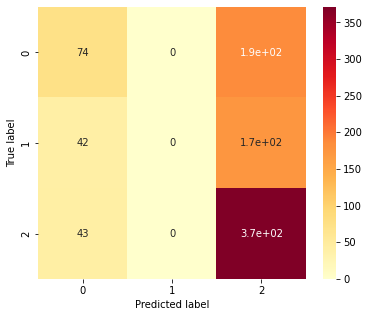

In [ ]:
#plotting the confusion matrix for trhe ada boost classifier
a=confusion_matrix(y_test, ad_classifier.predict(X_test))
print(a)
plt.figure(figsize=(6,5))
sns.heatmap(a,annot=True,cmap='YlOrRd')
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [ ]:
#evaluation metric for the ada boost including the k-fold validation
print("Balanced Accuracy of Ada Boost Classifier :",balanced_accuracy_score(y_test, ad_classifier.predict(X_test)))
print(100*" ")
print("F1-score of Ada Boost Classifier :",f1_score(y_test, ad_classifier.predict(X_test), pos_label='positive',average='weighted'))
print(100*" ")
print("Precision Score of Ada Boost Classifier : ",precision_score(y_test, ad_classifier.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("Recall Score of Ada Boost Classifier : ",recall_score(y_test, ad_classifier.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("K-Fold cross validation of Ada Boost Classifier :",cross_validate(ad_classifier, X, y, cv=10))


Balanced Accuracy of Ada Boost Classifier : 0.39358355010528917
                                                                                                    
F1-score of Ada Boost Classifier : 0.40463390080072476
                                                                                                    
Precision Score of Ada Boost Classifier :  0.3243109149466427
                                                                                                    
Recall Score of Ada Boost Classifier :  0.39358355010528917
                                                                                                    


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary

K-Fold cross validation of Ada Boost Classifier : {'fit_time': array([0.03988743, 0.03601217, 0.03597927, 0.0443871 , 0.05198169,
       0.04148245, 0.0388577 , 0.03544378, 0.03722477, 0.03620458]), 'score_time': array([0.0041604 , 0.00411677, 0.00812101, 0.0078156 , 0.00423169,
       0.00412679, 0.00430346, 0.00411558, 0.00412202, 0.00414109]), 'test_score': array([0.47811448, 0.4983165 , 0.46801347, 0.47811448, 0.47297297,
       0.51351351, 0.49662162, 0.48648649, 0.51689189, 0.43918919])}


Naive Bayes Classification

In [ ]:
#developing the naive bayes model
nb_classifier = MultinomialNB(alpha=3.8,fit_prior=True,class_prior=None)
nb_classifier.fit(X_train,y_train)
print("Accuracy of Ada Boost Classifier Training set",nb_classifier.score(X_train, y_train))
print("Accuracy of Ada Boost Classifier Testing set",nb_classifier.score(X_test, y_test))



Accuracy of Ada Boost Classifier Training set 0.54725168756027
Accuracy of Ada Boost Classifier Testing set 0.5314606741573034


[[130  11 119]
 [ 70  18 128]
 [ 78  11 325]]


Text(33.0, 0.5, 'True label')

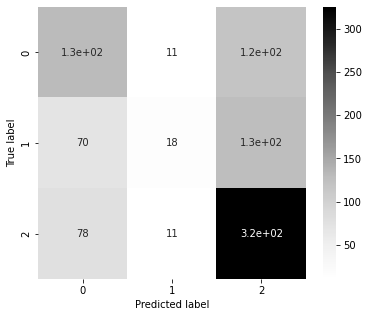

In [ ]:
#plotting the confusion matrix for naive bayes
b=confusion_matrix(y_test, nb_classifier.predict(X_test))
print(b)
plt.figure(figsize=(6,5))
sns.heatmap(b,annot=True,cmap='Greys')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
#evaluation metrics for naive bayes including the k fold validation
print("Balanced Accuracy of Naive Bayes Classifier :",balanced_accuracy_score(y_test, nb_classifier.predict(X_test)))
print(100*" ")
print("F1-score of Naive Bayes Classifier :",f1_score(y_test, nb_classifier.predict(X_test), pos_label='positive',average='weighted'))
print(100*" ")
print("Precision Score of Naive Bayes Classifier : ",precision_score(y_test, nb_classifier.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("Recall Score of Naive Bayes Classifier : ",recall_score(y_test, nb_classifier.predict(X_test),pos_label='positive',average='macro'))
print(100*" ")
print("K-Fold cross validation of Naive Bayes Classifier :",cross_validate(nb_classifier, X, y, cv=10))


Balanced Accuracy of Naive Bayes Classifier : 0.4561191626409018
                                                                                                    
F1-score of Naive Bayes Classifier : 0.4819623035008392
                                                                                                    
Precision Score of Naive Bayes Classifier :  0.4952692391541313
                                                                                                    
Recall Score of Naive Bayes Classifier :  0.4561191626409018
                                                                                                    
K-Fold cross validation of Naive Bayes Classifier : {'fit_time': array([0.00871634, 0.00603747, 0.00570774, 0.00562906, 0.00577021,
       0.0080924 , 0.00568581, 0.00578451, 0.00562859, 0.00560021]), 'score_time': array([0.00208783, 0.00198388, 0.00189304, 0.00190353, 0.0054183 ,
       0.00195169, 0.00186133, 0.00192165, 0.00185704, 0.00188971]),

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Plotting ROC AUC curve

In [ ]:
#using the predict_prob()function for plotting the roc curve
Log_prob=logistic_league.predict_proba(X_test)
svm_prob=svm_league.predict_proba(X_test)
ran_prob=rfc_classifier.predict_proba(X_test)
nai_prob=nb_classifier.predict_proba(X_test)
neu_prob= neural_classifier.predict_proba(X_test)
ada_prob=ad_classifier.predict_proba(X_test)

In [ ]:
#printin the roc auc score
print('AUC-ROC score for Logistic Regression       : %.3f' % roc_auc_score(y_test,Log_prob,multi_class="ovr"))
print('AUC-ROC score for Support Vector machine    : %.3f' % roc_auc_score(y_test,svm_prob,multi_class="ovr"))
print('AUC-ROC score for Random Forest Classifier  : %.3f' % roc_auc_score(y_test,ran_prob,multi_class="ovr"))
print('AUC-ROC score for Neural Network Classifier : %.3f' % roc_auc_score(y_test,neu_prob,multi_class="ovr"))
print('AUC-ROC score for Naive Bayes Classifier    : %.3f' % roc_auc_score(y_test,nai_prob,multi_class="ovr"))
print('AUC-ROC score for Ada Boost Classifier      : %.3f' % roc_auc_score(y_test,ada_prob,multi_class="ovr"))

AUC-ROC score for Logistic Regression       : 0.669
AUC-ROC score for Support Vector machine    : 0.675
AUC-ROC score for Random Forest Classifier  : 0.556
AUC-ROC score for Neural Network Classifier : 0.665
AUC-ROC score for Naive Bayes Classifier    : 0.669
AUC-ROC score for Ada Boost Classifier      : 0.628


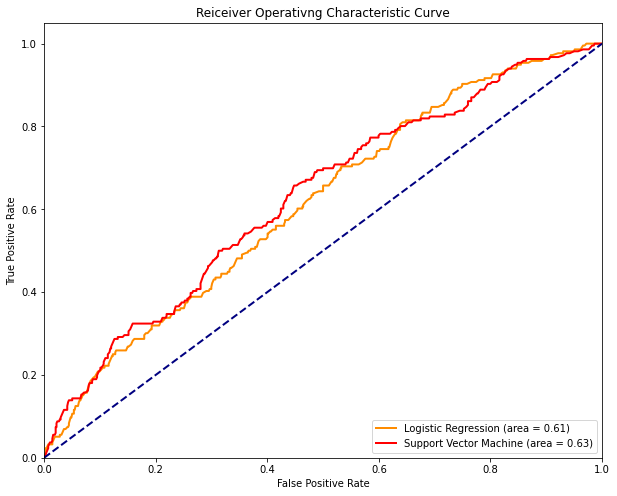

In [ ]:
#defining the true postive and false postive rate to plot the curve for two models
l_fpr,l_tpr,_ = roc_curve(y_test,Log_prob[:,1],pos_label=1)
sv_fpr,sv_tpr,_ = roc_curve(y_test,svm_prob[:,1],pos_label=1)

#setting the auc level in the plot
roc_auc = auc(l_fpr,l_tpr)
ro= auc(sv_fpr,sv_tpr)


#plotting the curve
lw=2
plt.figure(figsize=(10,8))
plt.plot(l_fpr,l_tpr, color= 'darkorange',lw=lw, label='Logistic Regression (area = %0.2f)'% roc_auc)
plt.plot(sv_fpr,sv_tpr, color= 'red',lw=lw, label='Support Vector Machine (area = %0.2f)'% ro)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reiceiver Operativng Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


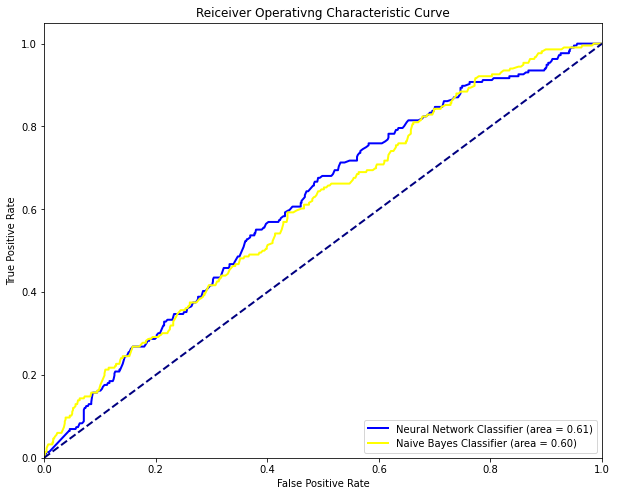

In [ ]:
#defining the true postive and false postive rate to plot the curve for another two models
nn_fpr,nn_tpr,_ = roc_curve(y_test,neu_prob[:,1],pos_label=1)
nb_fpr,nb_tpr,_ = roc_curve(y_test,nai_prob[:,1],pos_label=1)

#setting the auc level in the plot
roc_c= auc(nn_fpr,nn_tpr)
roc_a= auc(nb_fpr,nb_tpr)

#plotting the curve
lw=2
plt.figure(figsize=(10,8))
plt.plot(nn_fpr,nn_tpr, color= 'blue',lw=lw, label='Neural Network Classifier (area = %0.2f)'% roc_c)
plt.plot(nb_fpr,nb_tpr, color= 'yellow',lw=lw, label='Naive Bayes Classifier (area = %0.2f)'% roc_a)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reiceiver Operativng Characteristic Curve')
plt.legend(loc="lower right")
plt.show()



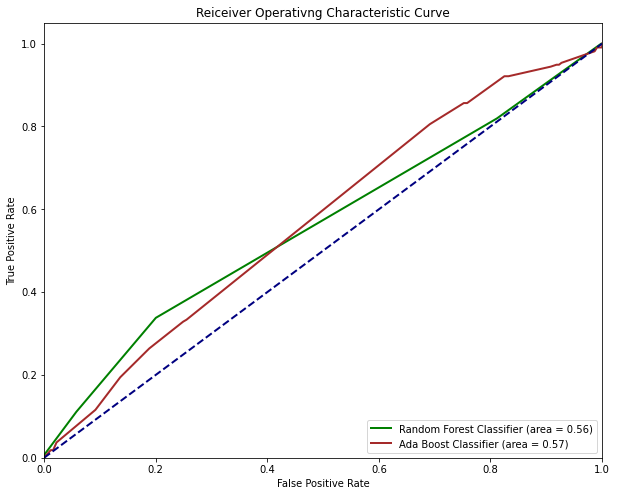

In [ ]:
#defining the true postive and false postive rate to plot the curve for two models
r_fpr,r_tpr,_ = roc_curve(y_test,ran_prob[:,1],pos_label=1)
a_fpr,a_tpr,_ = roc_curve(y_test,ada_prob[:,1],pos_label=1)
#setting the auc level in the plot
roc_= auc(r_fpr,r_tpr)
roc_b=auc(a_fpr,a_tpr)

#plotting the curve
lw=2
plt.figure(figsize=(10,8))
plt.plot(r_fpr,r_tpr, color= 'green',lw=lw, label='Random Forest Classifier (area = %0.2f)'% roc_)
plt.plot(a_fpr,a_tpr, color= 'brown',lw=lw, label='Ada Boost Classifier (area = %0.2f)'% roc_b)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reiceiver Operativng Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


Importing the dataset for predicting the results

In [ ]:
#importing the english premier league fixture for predicting the matches
epl_fixture= pd.read_csv(EPLfixure_path)
#opening empty list storing the matches
predi=[]

In [ ]:
#the fixture of premier league
epl_fixture.head()

,Nation,League,Date,Month,Year,Home,Away
0,England,Premier League,5,8,2022,Crystal Palace,Arsenal
1,England,Premier League,6,8,2022,Bournemouth,Aston Villa
2,England,Premier League,6,8,2022,Everton,Chelsea
3,England,Premier League,6,8,2022,Fulham,Liverpool
4,England,Premier League,6,8,2022,Leeds,Wolves


In [ ]:
#renaming the columns that match the trained data
fixture1=epl_fixture.rename(columns={'Home':'homeTeam','Away':'awayTeam'})
fixture1.head()


,Nation,League,Date,Month,Year,homeTeam,awayTeam
0,England,Premier League,5,8,2022,Crystal Palace,Arsenal
1,England,Premier League,6,8,2022,Bournemouth,Aston Villa
2,England,Premier League,6,8,2022,Everton,Chelsea
3,England,Premier League,6,8,2022,Fulham,Liverpool
4,England,Premier League,6,8,2022,Leeds,Wolves


In [ ]:
#assigning the team won column to the fixture so that it can match the trained data
e_fixture = fixture1.assign(TeamWon=None)
e_fixture.head()


,Nation,League,Date,Month,Year,homeTeam,awayTeam,TeamWon
0,England,Premier League,5,8,2022,Crystal Palace,Arsenal,None
1,England,Premier League,6,8,2022,Bournemouth,Aston Villa,None
2,England,Premier League,6,8,2022,Everton,Chelsea,None
3,England,Premier League,6,8,2022,Fulham,Liverpool,None
4,England,Premier League,6,8,2022,Leeds,Wolves,None


In [ ]:
#cutting the first 100 fixtures to predict
e_fixture = e_fixture.iloc[:100, :]

In [ ]:
#storing the new modified fixture in the empty list
predi=e_fixture.drop(['Nation','League','Month','Year','Date'],axis=1)
predi = pd.DataFrame(predi)
backup_predi = predi

predi.head()

,homeTeam,awayTeam,TeamWon
0,Crystal Palace,Arsenal,None
1,Bournemouth,Aston Villa,None
2,Everton,Chelsea,None
3,Fulham,Liverpool,None
4,Leeds,Wolves,None


In [ ]:
# getting dummy variables for the prediction dataset and removing the team won column
predi = pd.get_dummies(predi, prefix=['homeTeam', 'awayTeam'], columns=['homeTeam', 'awayTeam'])

# now we are comparing the prediction data with the training model by adding the missing columns
columns_missing = set(final_football_league1.columns) - set(predi.columns)
for c in columns_missing:
    predi[c] = 0
predi = predi[final_football_league1.columns]

# Removing winning team column to match it with trained data
predi = predi.drop(['TeamWon'], axis=1)

predi.head()

,homeTeam_Arsenal,homeTeam_Aston Villa,homeTeam_Birmingham City,homeTeam_Blackburn Rovers,homeTeam_Blackpool,homeTeam_Bolton Wanderers,homeTeam_Bournemouth,homeTeam_Burnley,homeTeam_Cardiff City,homeTeam_Chelsea,homeTeam_Crystal Palace,homeTeam_Everton,homeTeam_Fulham,homeTeam_Hull City,homeTeam_Leicester City,homeTeam_Liverpool,homeTeam_Manchester City,homeTeam_Manchester United,homeTeam_Middlesbrough,homeTeam_Newcastle United,homeTeam_Norwich City,homeTeam_Portsmouth,homeTeam_Queens Park Rangers,homeTeam_Reading,homeTeam_Southampton,homeTeam_Stoke City,homeTeam_Sunderland,homeTeam_Swansea City,homeTeam_Tottenham Hotspur,homeTeam_Watford,homeTeam_West Bromwich Albion,homeTeam_West Ham United,homeTeam_Wigan Athletic,homeTeam_Wolverhampton Wanderers,awayTeam_Arsenal,awayTeam_Aston Villa,awayTeam_Birmingham City,awayTeam_Blackburn Rovers,awayTeam_Blackpool,awayTeam_Bolton Wanderers,awayTeam_Bournemouth,awayTeam_Burnley,awayTeam_Cardiff City,awayTeam_Chelsea,awayTeam_Crystal Palace,awayTeam_Everton,awayTeam_Fulham,awayTeam_Hull City,awayTeam_Leicester City,awayTeam_Liverpool,awayTeam_Manchester City,awayTeam_Manchester United,awayTeam_Middlesbrough,awayTeam_Newcastle United,awayTeam_Norwich City,awayTeam_Portsmouth,awayTeam_Queens Park Rangers,awayTeam_Reading,awayTeam_Southampton,awayTeam_Stoke City,awayTeam_Sunderland,awayTeam_Swansea City,awayTeam_Tottenham Hotspur,awayTeam_Watford,awayTeam_West Bromwich Albion,awayTeam_West Ham United,awayTeam_Wigan Athletic,awayTeam_Wolverhampton Wanderers
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
predic = logistic_league.predict(predi)
for i in range(e_fixture.shape[0]):
    print(backup_predi.iloc[i, 1] + " and " + backup_predi.iloc[i, 0])
    if predic[i] == 2:
        print("Winner: " + backup_predi.iloc[i, 1])
    elif predic[i] == 1:
        print("Draw")
    elif predic[i] == 0:
        print("Winner: " + backup_predi.iloc[i, 0])
    print('Probability of ' + backup_predi.iloc[i, 1] + ' winning: ', '%.3f'%(logistic_league.predict_proba(predi)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logistic_league.predict_proba(predi)[i][1]))
    print('Probability of ' + backup_predi.iloc[i, 0] + ' winning: ', '%.3f'%(logistic_league.predict_proba(predi)[i][0]))
    print("")


Arsenal and Crystal Palace
Winner: Crystal Palace
Probability of Arsenal winning:  0.315
Probability of Draw:  0.261
Probability of Crystal Palace winning:  0.424

Aston Villa and Bournemouth
Winner: Aston Villa
Probability of Aston Villa winning:  0.438
Probability of Draw:  0.267
Probability of Bournemouth winning:  0.295

Chelsea and Everton
Winner: Everton
Probability of Chelsea winning:  0.363
Probability of Draw:  0.270
Probability of Everton winning:  0.367

Liverpool and Fulham
Winner: Fulham
Probability of Liverpool winning:  0.371
Probability of Draw:  0.214
Probability of Fulham winning:  0.416

Wolves and Leeds
Winner: Wolves
Probability of Wolves winning:  0.450
Probability of Draw:  0.258
Probability of Leeds winning:  0.291

Nottingham and Newcastle
Winner: Nottingham
Probability of Nottingham winning:  0.450
Probability of Draw:  0.258
Probability of Newcastle winning:  0.291

Southampton and Tottenham
Winner: Southampton
Probability of Southampton winning:  0.424
Proba

In [ ]:
predic = svm_league.predict(predi)
for i in range(e_fixture.shape[0]):
    print(backup_predi.iloc[i, 1] + " and " + backup_predi.iloc[i, 0])
    if predic[i] == 2:
        print("Winner: " + backup_predi.iloc[i, 1])
    elif predic[i] == 1:
        print("Draw")
    elif predic[i] == 0:
        print("Winner: " + backup_predi.iloc[i, 0])
    print('Probability of ' + backup_predi.iloc[i, 1] + ' winning: ', '%.3f'%(svm_league.predict_proba(predi)[i][2]))
    print('Probability of Draw: ', '%.3f'%(svm_league.predict_proba(predi)[i][1]))
    print('Probability of ' + backup_predi.iloc[i, 0] + ' winning: ', '%.3f'%(svm_league.predict_proba(predi)[i][0]))
    print("")


Arsenal and Crystal Palace
Winner: Crystal Palace
Probability of Arsenal winning:  0.222
Probability of Draw:  0.258
Probability of Crystal Palace winning:  0.520

Aston Villa and Bournemouth
Winner: Bournemouth
Probability of Aston Villa winning:  0.345
Probability of Draw:  0.271
Probability of Bournemouth winning:  0.384

Chelsea and Everton
Winner: Chelsea
Probability of Chelsea winning:  0.544
Probability of Draw:  0.202
Probability of Everton winning:  0.255

Liverpool and Fulham
Winner: Liverpool
Probability of Liverpool winning:  0.442
Probability of Draw:  0.201
Probability of Fulham winning:  0.357

Wolves and Leeds
Winner: Wolves
Probability of Wolves winning:  0.431
Probability of Draw:  0.270
Probability of Leeds winning:  0.299

Nottingham and Newcastle
Winner: Nottingham
Probability of Nottingham winning:  0.431
Probability of Draw:  0.270
Probability of Newcastle winning:  0.299

Southampton and Tottenham
Winner: Tottenham
Probability of Southampton winning:  0.324
Prob